In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt 
sns.set_theme(style='white')
plt.style.use('ggplot')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings
warnings.filterwarnings('ignore')

### Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [2]:
df=pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [5]:
df.isna().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


### Checking for the values which are equal to zero.

In [7]:
fc1=df.x==0
fc2=df.y==0
fc3=df.z==0

In [8]:
df[fc1|fc2|fc3]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
5821,5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [9]:
# Checking for the values which are equal to zero.
print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((df.depth==0).sum()))

Number of rows with x == 0: 3 
Number of rows with y == 0: 3 
Number of rows with z == 0: 9 
Number of rows with depth == 0: 0 


In [10]:
df.shape

(26967, 11)

In [11]:
#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(26958, 11)

In [12]:
dups =df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(26958, 11)


In [13]:
#show the information about dataset
df_dtype=df.dtypes
df_missing=df.isna().mean().round(4)*100
df_desc = df.describe(include='all')
dtls_1=pd.DataFrame(df_missing, columns=['missing'])
dtls_2=pd.DataFrame(df_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(df_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

,missing,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
depth,2.59,float64,26261.0,NaN,NaN,NaN,61.745345,1.412395,50.8,61.0,61.8,62.5,73.6
Unnamed: 0,0.00,int64,26958.0,NaN,NaN,NaN,13484.289524,7785.384674,1.0,6743.25,13485.5,20226.75,26967.0
carat,0.00,float64,26958.0,NaN,NaN,NaN,0.79819,0.477602,0.2,0.4,0.7,1.05,4.5
cut,0.00,object,26958,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,0.00,object,26958,7,G,5658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,0.00,object,26958,8,SI1,6570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
table,0.00,float64,26958.0,NaN,NaN,NaN,57.455342,2.231227,49.0,56.0,57.0,59.0,79.0
x,0.00,float64,26958.0,NaN,NaN,NaN,5.730105,1.126714,3.73,4.71,5.69,6.55,10.23
y,0.00,float64,26958.0,NaN,NaN,NaN,5.733832,1.164342,3.71,4.7125,5.7,6.54,58.9
z,0.00,float64,26958.0,NaN,NaN,NaN,3.539238,0.717838,1.07,2.9,3.52,4.04,31.8


### Observation:
- The data set contains 26967 row, 11 columns .
- In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features. Where 'price' is the target variable and all other are predector variable.
- The first column is an index ("Unnamed: 0")as this only serial no, we can remove it.
- Except depth, in all the column non null count is 26967.

In [14]:
# drop the serial no column as it is useless for the model
df = df.drop('Unnamed: 0', axis=1)

In [15]:
df.shape

(26958, 10)

In [16]:
#show the information about dataset
df_dtype=df.dtypes
df_missing=df.isna().mean().round(4)*100
df_desc = df.describe(include='all')
dtls_1=pd.DataFrame(df_missing, columns=['missing'])
dtls_2=pd.DataFrame(df_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(df_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

,missing,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
depth,2.59,float64,26261.0,NaN,NaN,NaN,61.745345,1.412395,50.8,61.0,61.8,62.5,73.6
carat,0.00,float64,26958.0,NaN,NaN,NaN,0.79819,0.477602,0.2,0.4,0.7,1.05,4.5
cut,0.00,object,26958,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,0.00,object,26958,7,G,5658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,0.00,object,26958,8,SI1,6570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
table,0.00,float64,26958.0,NaN,NaN,NaN,57.455342,2.231227,49.0,56.0,57.0,59.0,79.0
x,0.00,float64,26958.0,NaN,NaN,NaN,5.730105,1.126714,3.73,4.71,5.69,6.55,10.23
y,0.00,float64,26958.0,NaN,NaN,NaN,5.733832,1.164342,3.71,4.7125,5.7,6.54,58.9
z,0.00,float64,26958.0,NaN,NaN,NaN,3.539238,0.717838,1.07,2.9,3.52,4.04,31.8
price,0.00,int64,26958.0,NaN,NaN,NaN,3938.311262,4023.359737,326.0,945.0,2375.0,5358.0,18818.0


### Observation:
- On the given data set the the mean and median values does not have much difference.
- We can observe Min value of "x", "y", & "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we need to filter out those as it clearly faulty data entries. There are three object data type 'cut', 'color' and 'clarity'.

### Univariate Analysis

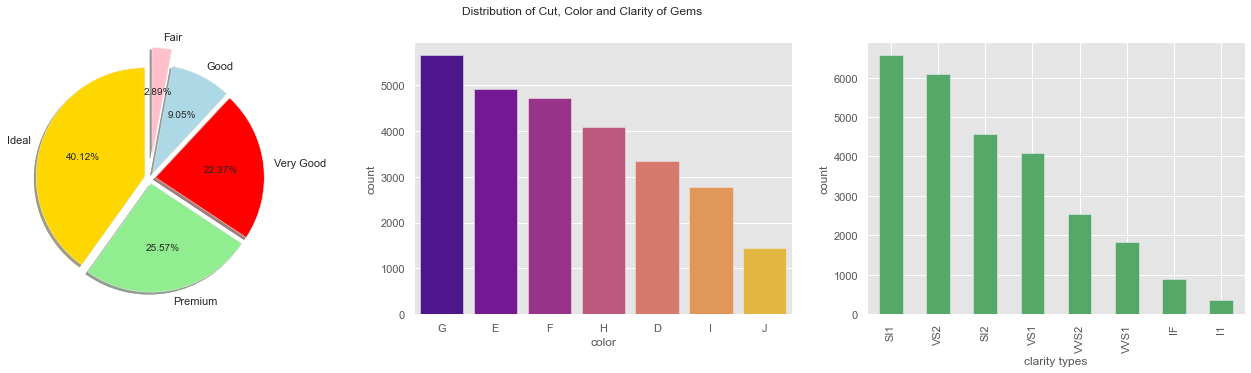

In [17]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['cut'].value_counts().values,
        labels=df['cut'].value_counts().index,
        startangle=90,
        colors=['gold', 'lightgreen', 'red', 'lightblue', 'pink'],
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')

plt.subplot(132)
sns.countplot(df['color'], palette='plasma', order=df['color'].value_counts().index)

plt.subplot(133)
df["clarity"].value_counts().plot.bar(color='g')
plt.xlabel('clarity types')
plt.ylabel('count')


plt.suptitle('Distribution of Cut, Color and Clarity of Gems')
plt.show()

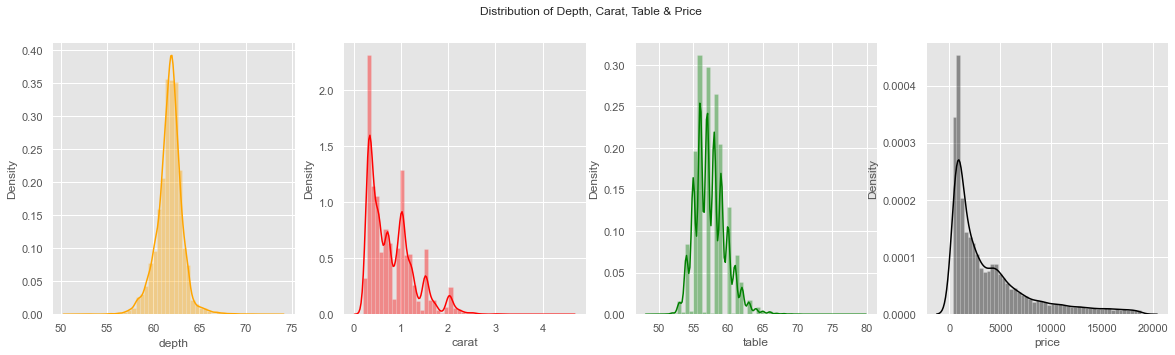

In [18]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(141)
sns.distplot(df['depth'], color='orange')

plt.subplot(142)
sns.distplot(df['carat'], color='red')

plt.subplot(143)
sns.distplot(df['table'], color='green')

plt.subplot(144)
sns.distplot(df['price'], color='black')

plt.suptitle('Distribution of Depth, Carat, Table & Price ')
plt.show()

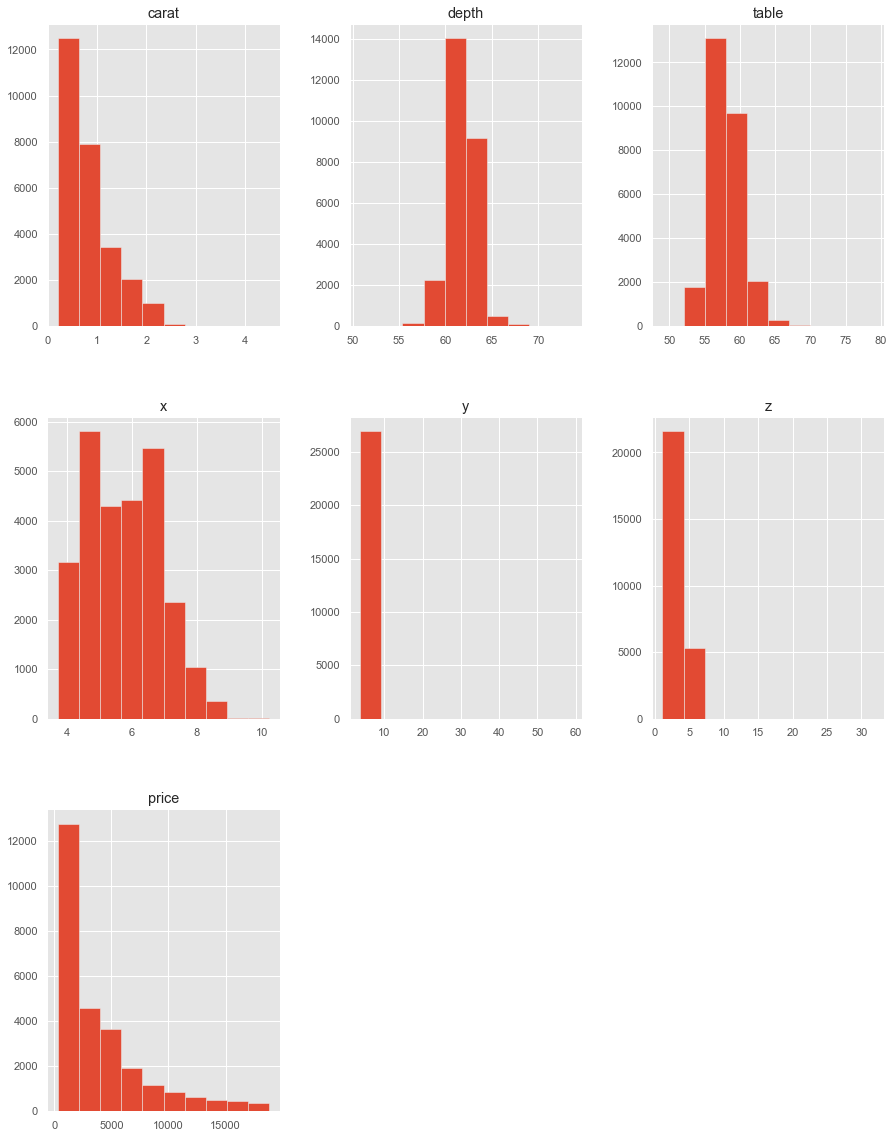

In [19]:
df.hist(figsize=(15,20),grid=True);

In [20]:
numcol=['carat','depth','table','x','y','z','price']

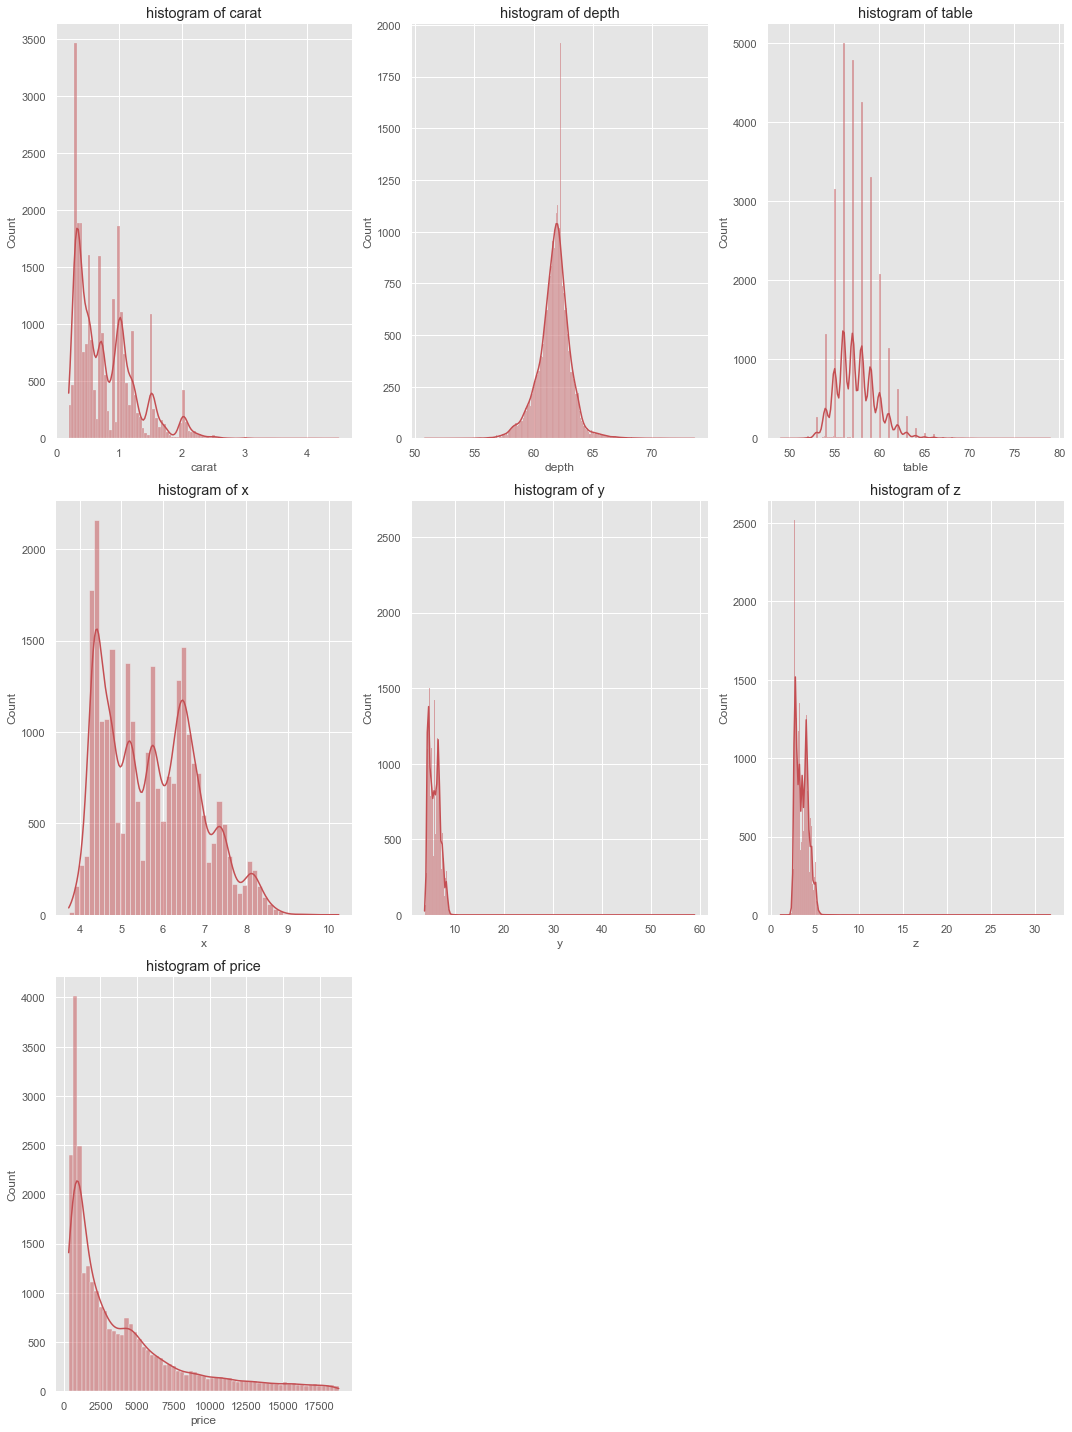

In [21]:
plt.figure(figsize = (15,20))
feature_list = df[numcol].columns
for i in range(len(feature_list)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(x= df[feature_list[i]], data = df,kde=True,color='r')
    plt.title('histogram of {}'.format(feature_list[i]))
    plt.tight_layout()

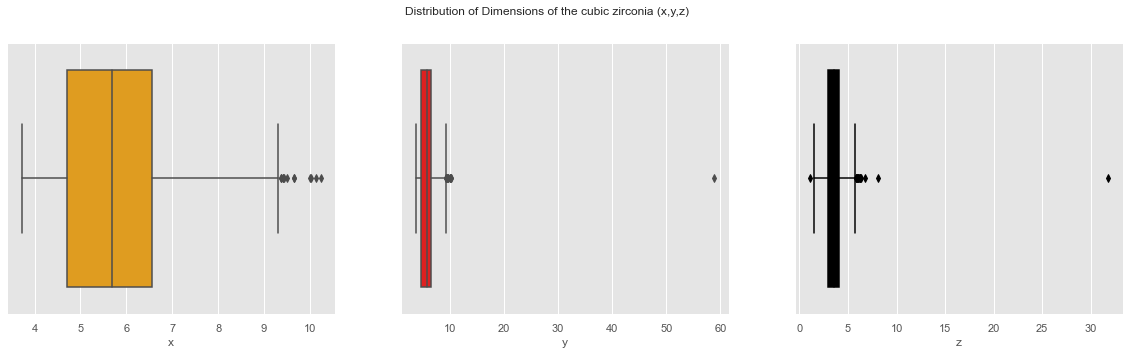

In [22]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(df['x'], color='orange')

plt.subplot(132)
sns.boxplot(df['y'], color='red')

plt.subplot(133)
sns.boxplot(df['z'], color='black')

plt.suptitle('Distribution of Dimensions of the cubic zirconia (x,y,z)')
plt.show()

In [23]:
df.skew()   # to measure the skeweness of every attribute.

carat    1.116530
depth   -0.027571
table    0.764957
x        0.402531
y        3.879939
z        2.634182
price    1.618432
dtype: float64

### Observation:
- There is significant amount of outlier present in some variable. We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed".

### Bivariate Analysis

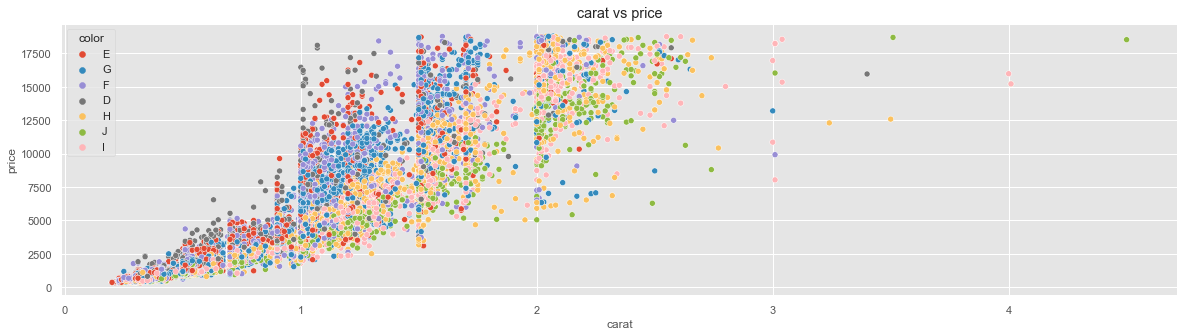

In [24]:
sns.scatterplot(df['carat'], df['price'],hue=df['color'])
plt.title('carat vs price')
plt.show()

### Observation 
- If carat increased price is also increases

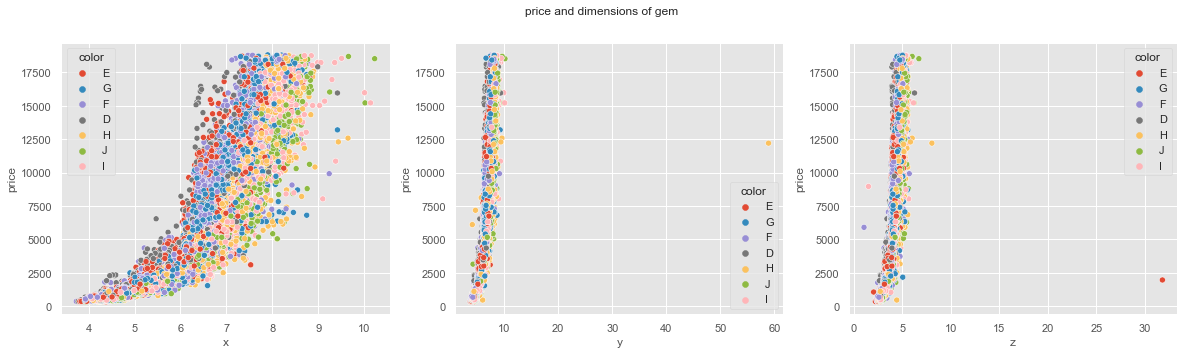

In [25]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.scatterplot(df['x'], df['price'],hue=df['color'], color='orange')

plt.subplot(132)
sns.scatterplot(df['y'], df['price'],hue=df['color'], color='orange')

plt.subplot(133)
sns.scatterplot(df['z'], df['price'],hue=df['color'], color='orange')

plt.suptitle('price and dimensions of gem')
plt.show()

<AxesSubplot:xlabel='clarity', ylabel='price'>

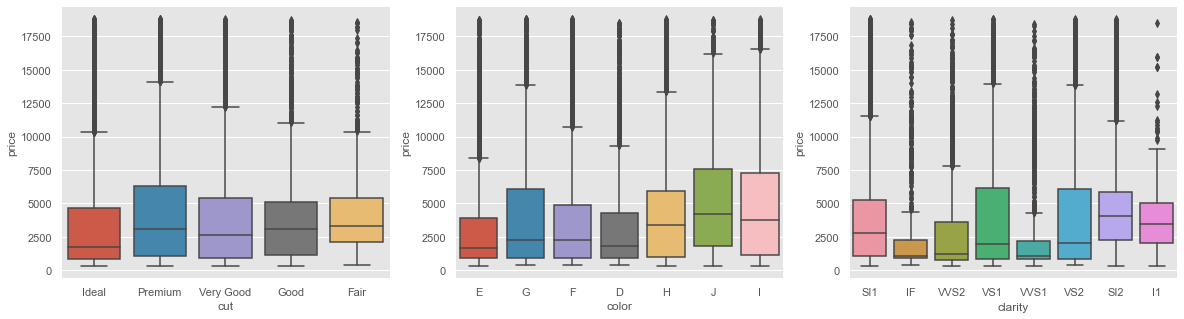

In [26]:
plt.subplot(131)
sns.boxplot(df['cut'], df['price'])

plt.subplot(132)
sns.boxplot(df['color'], df['price'])

plt.subplot(133)
sns.boxplot(df['clarity'], df['price'])

### 
- Observation on 'CUT': The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut. 
- Observation on 'clarity': The Diamonds clarity with VS1 & VS2 are the most Expensive.

In [27]:
df[['price', 'cut']].groupby(['cut']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

In [28]:
df[['price', 'color']].groupby(['color']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

In [29]:
df[['price', 'clarity']].groupby(['clarity']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

In [30]:
df.skew()

carat    1.116530
depth   -0.027571
table    0.764957
x        0.402531
y        3.879939
z        2.634182
price    1.618432
dtype: float64

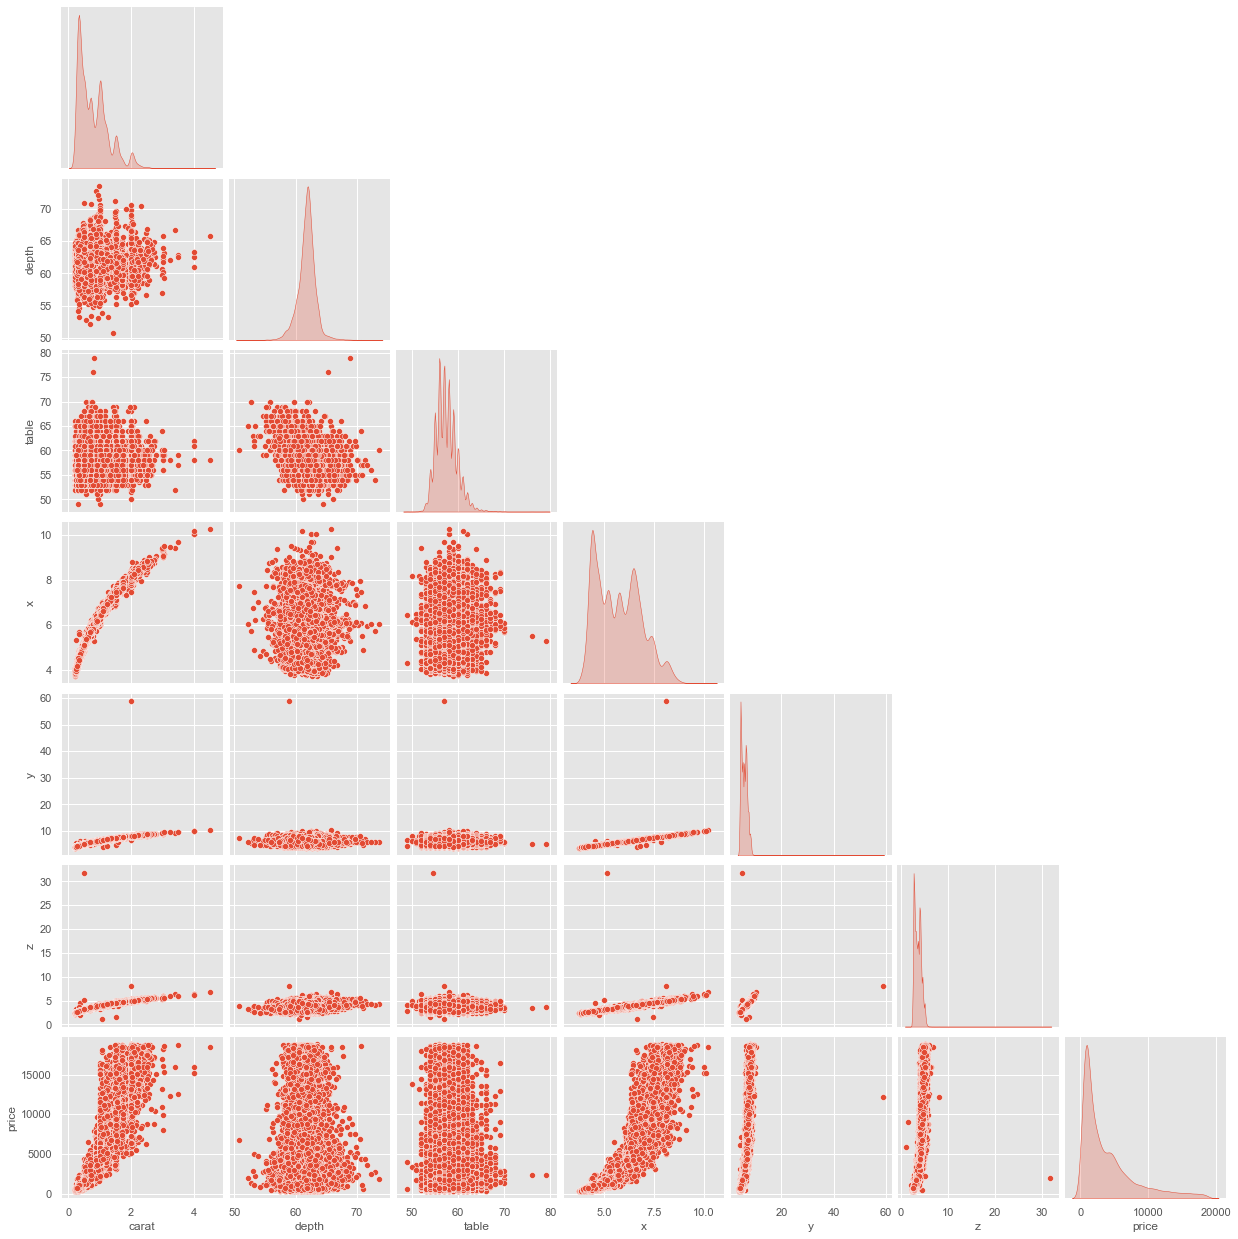

In [31]:
sns.pairplot(data=df,corner=True,diag_kind='kde');

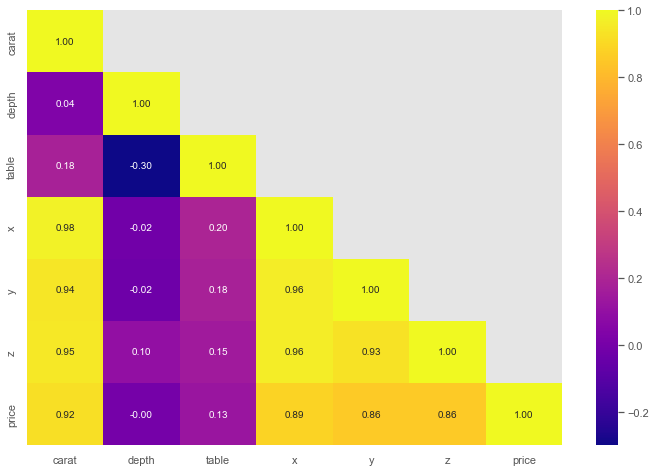

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='plasma',mask=np.triu(df.corr(),+1))
plt.show()

### How each feature affects the price of diamonds.

In [33]:
correlations = df.corr()
correlations=pd.DataFrame(correlations)
correlations

,carat,depth,table,x,y,z,price
carat,1.000000,0.035711,0.181669,0.977848,0.942393,0.946805,0.922409
depth,0.035711,1.000000,-0.297750,-0.018467,-0.024515,0.101410,-0.002381
table,0.181669,-0.297750,1.000000,0.197780,0.183832,0.151259,0.127088
x,0.977848,-0.018467,0.197780,1.000000,0.962590,0.961077,0.887501
y,0.942393,-0.024515,0.183832,0.962590,1.000000,0.933100,0.857361
z,0.946805,0.101410,0.151259,0.961077,0.933100,1.000000,0.855920
price,0.922409,-0.002381,0.127088,0.887501,0.857361,0.855920,1.000000


### Observation:
- It can be inferred that most features correlate with the price of Diamond. The notable exception is "depth" which has a negligible correlation.

### The inferences drawn from the above Exploratory Data analysis:

- 'Price' is the target variable while all others are the predictors
- The data set contains 26967 row, 11 column.
- In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features.
- There are three object data type 'cut', 'color' and 'clarity'.
- Where 'price' is the target variable and all other are predector variable
- The first column is an index ("Unnamed: 0") as this only serial no, we can drop it.
- On the given data set the the mean and median values does not have much difference. -We can observe Min value of "x", "y", "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we have filter out those as it clearly faulty data entries.
- we can observe there are 697 missing value in the depth column. There are no duplicate row present.
- There are significant amount of outlier present in some variable,the features with datapoint that are far from the rest of dataset which will affect the outcome of our regression model. So we have treat the outliars. We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed".
- It looks like most features do correlate with the price of Diamond. The notable exception is "depth" which has a negligble correlation. The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.

In [34]:
# As we have checked there Are some missing values.
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [35]:
df.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2375.00
dtype: float64

### Imputing missing values

In [36]:
#lets replace the missing values with median value. 
df =df.fillna(df.median())

In [37]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Outlier Checks.

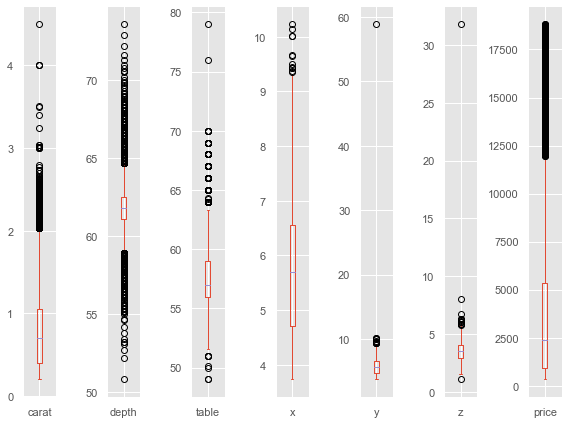

In [38]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
df[cols].plot(kind = 'box',subplots=True, figsize = (8,6));
plt.tight_layout();

### Treating the outliers

In [39]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [40]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

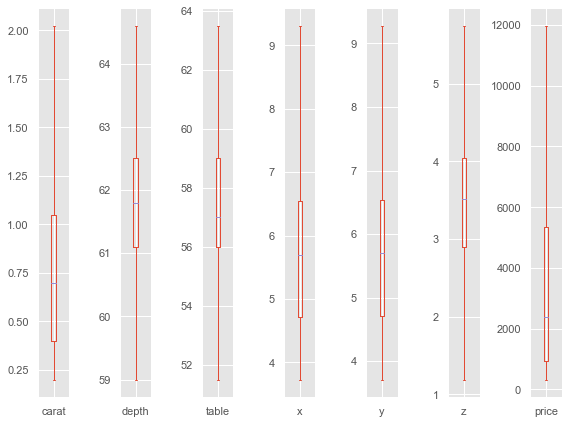

In [41]:
df[cols].plot(kind = 'box',subplots=True, figsize = (8,6));
plt.tight_layout();

### Do you think scaling is necessary?
Scaling or Standardizing the features around the centre and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bias.

For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem.

In this data set we can see the all the variable are in different scale i.e price are in 1000s unit and depth and table are in 100s unit, and carat is in 10s. So its necessary to scale or standardise the data to allow each variable to be compared on a common scale. With data measured in different "units" or on different scales (as here with different means and variances) this is an important data processing step if the results are to be meaningful or not dominated by the variables that have large variances.

### Geting unique counts of all Objects.

In [42]:
print('cut\n',df.cut.value_counts())
print('\n')
print('color\n',df.color.value_counts())
print('\n')
print('clarity\n',df.clarity.value_counts())
print('\n')

cut
 Ideal        10816
Premium       6893
Very Good     6030
Good          2439
Fair           780
Name: cut, dtype: int64


color
 G    5658
E    4917
F    4727
H    4098
D    3344
I    2771
J    1443
Name: color, dtype: int64


clarity
 SI1     6570
VS2     6098
SI2     4571
VS1     4092
VVS2    2531
VVS1    1839
IF       894
I1       363
Name: clarity, dtype: int64




### Converting objects to categorical codes.
- Columns in this data having a proper order.
- We need to rank and encode them accordingly

In [43]:
df['cut']=np.where(df['cut'] =='Ideal', '4', df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '3', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Fair', '0', df['cut'])

In [44]:
df['color']=np.where(df['color'] =='D', '6', df['color'])
df['color']=np.where(df['color'] =='E', '5', df['color'])
df['color']=np.where(df['color'] =='F', '4', df['color'])
df['color']=np.where(df['color'] =='G', '3', df['color'])
df['color']=np.where(df['color'] =='H', '2', df['color'])
df['color']=np.where(df['color'] =='I', '1', df['color'])
df['color']=np.where(df['color'] =='J', '0', df['color'])

In [45]:
df['clarity']=np.where(df['clarity'] =='IF', '7', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '6', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '5', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '0', df['clarity'])

In [46]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [47]:
# converting the'cut','color','clarity' column from object / string type to float.

df['cut'] = df['cut'].astype('float64')
df['color'] = df['color'].astype('float64')
df['clarity'] = df['clarity'].astype('float64')

In [48]:
df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [49]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0


### Train-Test Split:

In [50]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = df[['price']]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [51]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1234)

In [52]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8768.122959219027
The coefficient for cut is 111.21261062773083
The coefficient for color is 269.09381481875477
The coefficient for clarity is 431.101076508242
The coefficient for depth is 42.99649603624212
The coefficient for table is -13.060473400933297
The coefficient for x is -1113.4754723798123
The coefficient for y is 1477.3535206065073
The coefficient for z is -1157.8801461134092


### Observation: 
- Y=mx +c (m= m1,m2,m3...m9) here 9 diferent co-efficients will learn aling with the intercept which is "c" from the model.

- From the above coefficients for each of the independent attributes we can conclude
- The one unit increase in carat increases price by 8768.12.
- The one unit increase in cut increases price by 111.21.
- The one unit increase in color increases price by 269.09.
- The one unit increase in clarity increases price by 431.10.
- The one unit increase in depth increases price by 42.99,
- But The one unit increase in table decreases price by -13.06
- The one unit increase in x decreases price by -1113.47
- The one unit increase in y increases price by 1477.35.
- The one unit increase in z decreases price by -1157.88.

In [54]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -5669.805801939947


In [55]:
# R square on training data
regression_model.score(X_train, y_train)

0.9317921329429523

In [56]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

# R square on testing data
regression_model.score(X_test, y_test)

0.9301428919874972

### Observation:
- R-square is the percentage of the response variable variation that is explained by a linear model. Or:

- R-square = Explained variation / Total variation

- R-squared is always between 0 and 100%: 0% indicates that the model explains none of the variability of the response data around its mean.100% indicates that the model explains all the variability of the response data around its mean. In this regression model we can see the R-square value on Training and Test data respectively 0.9317921329429523 and 0.9301428919874972.

In [57]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

907.4237113714503

In [58]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

913.8707681086399

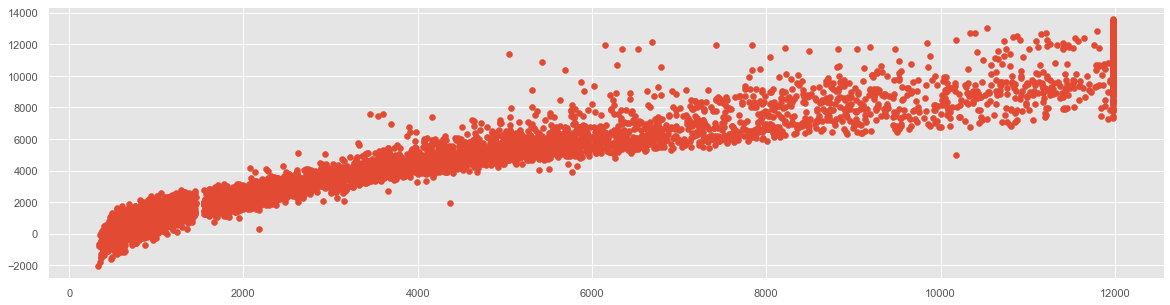

In [59]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred);

### Observation:
- we can see that there is a linear plot, very strong corelation between the predicted y and actual y. But there are lots of spread. That indicated some kind noise present on the data set i.e Unexplained variances on the output.

Linear regression Performance Metrics:

- intercept for the model: -5669.805801939947
- R square on training data: 0.9317921329429523
- R square on testing data: 0.9301428919874972
- RMSE on Training data: 907.4237113714503
- RMSE on Testing data: 913.8707681086399
- As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

### Applying zscore statsmodels

In [60]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [61]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [62]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1696971236126987
The coefficient for cut is 0.03567807527719519
The coefficient for color is 0.13164243587969596
The coefficient for clarity is 0.2042052172287884
The coefficient for depth is 0.015021414165020624
The coefficient for table is -0.008135516723894598
The coefficient for x is -0.36158908996599837
The coefficient for y is 0.47620234125340266
The coefficient for z is -0.23229774812849527


In [63]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 6.978190484948235e-16


In [64]:
regression_model.score(X_train_scaled,y_train_scaled)

0.9317921329429523

In [65]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.93011756596602

In [66]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

0.26116635896885293

In [67]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))

0.26435285894799765

### Observation:
Now we can observe by applying z score the intercept became 6.978190484948235e-16. Earlier it was -5669.805801939947. the co-efficient has changed, the bias became nearly zero but the overall accuracy still same.

### Check Multi-collinearity using VIF

In [68]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [69]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 122.75923145404377
cut ---> 10.300191403435587
color ---> 5.542860038347819
clarity ---> 5.458742212073717
depth ---> 1219.131927680454
table ---> 874.3136618742088
x ---> 10685.460994184037
y ---> 9435.554493404761
z ---> 3315.6810457713145


- We can observe there are very strong multi collinearity present in the data set. Ideally it should be within 1 to 5.

### Linear Regression using statsmodels

### concatenate X and y into a single dataframe

In [70]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
2133,1.86,4.0,0.0,3.0,62.6,56.0,7.95,7.87,4.95,10312.0
21703,0.30,4.0,4.0,2.0,62.5,56.0,4.28,4.30,2.68,475.0
1558,0.32,2.0,2.0,4.0,63.1,57.0,4.37,4.34,2.75,720.0
19656,0.52,4.0,6.0,3.0,61.0,57.0,5.18,5.21,3.17,1774.0
25476,1.01,0.0,2.0,4.0,64.6,55.0,6.28,6.24,4.14,4044.0


In [71]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept   -5669.805802
carat        8768.122959
cut           111.212611
color         269.093815
clarity       431.101077
depth          42.996496
table         -13.060473
x           -1113.475472
y            1477.353521
z           -1157.880146
dtype: float64

In [72]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 2.863e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        06:36:48   Log-Likelihood:            -1.5529e+05
No. Observations:               18870   AIC:                         3.106e+05
Df Residuals:                   18860   BIC:                         3.107e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5669.8058    830.016     -6.831      0.0

### Observation:
- Assuming null hypothesis is true, i.e there is no relationship between this variable with price. from that universe we have drawn the sample and on this sample we have found this co-efficient for the variable shown above.

- Now we can ask what is the probability of finding this co-efficient in this drawn sample if in the real world the co-efficient is zero. As we see here the overall P value is less than alpha, so rejecting H0 and accepting Ha.

In [73]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
mse

823417.7919591394

In [74]:
# Calculate MSE
mse1 = np.mean((lm1.predict(data_test.drop('price',axis=1))-data_test['price'])**2)
mse1

835159.7808034781

In [75]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

907.4237113714515

In [76]:
#Root Mean Squared Error - RMSE
np.sqrt(mse1)

913.8707681086413

In [77]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

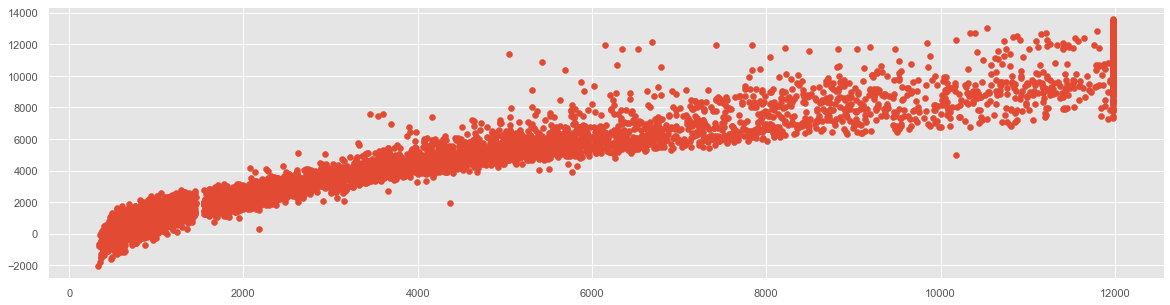

In [78]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [79]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-5669.81) * Intercept + (8768.12) * carat + (111.21) * cut + (269.09) * color + (431.1) * clarity + (43.0) * depth + (-13.06) * table + (-1113.48) * x + (1477.35) * y + (-1157.88) * z + 

### The final Linear Regression equation is
- price = b0 + b1 *carat + b2 * cut + b3 * color + b4 * clarity+ b5 * depth + b6 * table + b7 * x + b8 * y + b9 *z

- price = (-5669.81) * Intercept + (8768.12) * carat + (111.21) * cut + (269.09) * color + (431.1) * clarity + (43.0) * depth + (-13.06) * table + (-1113.48) * x + (1477.35) * y + (-1157.88) * z

- When carat increases by 1 unit, diamond price increases by 8768.12 unit, keeping all other predictors constant.
- When cut increases by 1 unit, diamond price increases by 111.21 unit, keeping all other predictors constant.
- When color increases by 1 unit, diamond price increases by 269.09 unit, keeping all other predictors constant.
- When clarity increases by 1 unit, diamond price increases by 431.1 unit, keeping all other predictors constant.
- When depth increases by 1 unit, diamond price increases by 43.0 unit, keeping all other predictors constant.
- When y increases by 1 unit, diamond price increases by 1477.35 unit, keeping all other predictors constant.
- As per model these five attributes that are most important attributes 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price.

- There are also some negative co-efficient values, for instance, corresponding co-efficient (-1113.48) for 'x',(-1157.88) for z and (-13.06) for table This implies, these are inversely proportional with diamond price.

- On the given data set we can see the 'X' i.e Length of the cubic zirconia in mm. having negative co-efficient. And the p value is less than 0.05, so can conclude that as higher the length of the stone is a lower profitable stones.

- Similarly for the 'z' variable having negative co-efficient i.e -1157.88. And the p value is less than 0.05, so we can conclude that as higher the 'z' of the stone is a lower profitable stones.

- Also we can see the 'y' width in mm having positive co-efficient. And the p value is less than 0.05, so we can conclude that higher the width of the stone is a higher profitable stones.

- Finally we can conclude that best 5 attributes that are most important are 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price positively.

### Inference: Basis on these predictions, what are the business insights and recommendations.

### Inference
- we can see that there is a linear plot, very strong corelation between the predicted y and actual y. But there are lots of spread. That indicated some kind noise present on the data set i.e Unexplained variances on the output.
- Linear regression Performance Metrics:

- intercept for the model: -5669.805801939947
- R square on training data: 0.9317921329429523
- R square on testing data: 0.9301428919874972
- RMSE on Training data: 907.4237113714503
- RMSE on Testing data: 913.8707681086399
- As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

### Impact of Scaling
Now we can observe by applying z score the intercept became 6.978190484948235e-16. Earlier it was -5669.805801939947. the co-efficient has changed, the bias became nearly zero but the overall accuracy still same.

### From statsmodels:
- we can see R-squared:0.932 and Adj. R-squared: 0.932 are same. The overall P value is less than alpha.

- Finally we can conclude that Best 5 attributes that are most important are 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price.
- When carat increases by 1 unit, diamond price increases by 8768.12 unit, keeping all other predictors constant.

- When cut increases by 1 unit, diamond price increases by 111.21 unit, keeping all other predictors constant.

- When color increases by 1 unit, diamond price increases by 269.09 unit, keeping all other predictors constant.

- When clarity increases by 1 unit, diamond price increases by 431.1 unit, keeping all other predictors constant.

- When depth increases by 1 unit, diamond price increases by 43.0 unit, keeping all other predictors constant.

- When y increases by 1 unit, diamond price increases by 1477.35 unit, keeping all other predictors constant.

- As per model these five attributes that are most important attributes 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price.

- There are also some negative co-efficient values, for instance, corresponding co-efficient (-1113.48) for 'x',(-1157.88) for z and (-13.06) for table This implies, these are inversely proportional with diamond price.

- On the given data set we can see the 'X' i.e Length of the cubic zirconia in mm. having negative co-efficient. And the p value is less than 0.05, so can conclude that as higher the length of the stone is a lower profitable stones.

- Similarly for the 'z' variable having negative co-efficient i.e -1157.88. And the p value is less than 0.05, so we can conclude that as higher the 'z' of the stone is a lower profitable stones.

- Also we can see the 'y' width in mm having positive co-efficient. And the p value is less than 0.05, so we can conclude that higher the width of the stone is a higher profitable stones.

- Finally we can conclude that best 5 attributes that are most important are 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price positively.

### Recommendations
- The Gem Stones company should consider the features'Carat', 'Cut', 'color','clarity' and width i.e 'y' as most important for predicting the price.
- To distinguish between higher profitable stones and lower profitable stones so as to have better profit share.

- As we can see from the model Higher the width('y') of the stone is higher the price.

- So the stones having higher width('y') should consider in higher profitable stones.
- The 'Premium Cut' on Diamonds are the most Expensive, followed by 'Very Good' Cut, these should consider in higher profitable stones.

- The Diamonds clarity with 'VS1' &'VS2' are the most Expensive. So these two category also consider in higher profitable stones.

- As we see for 'X' i.e Length of the stone, higher the length of the stone is lower the price.

- So higher the Length('x') of the stone are lower is the profitability.
- higher the 'z' i.e Height of the stone is, lower the price.This is because if a Diamond's Height is too large Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light. That is why Stones with higher 'z' is also are lower in profitability.

### Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [80]:
holiday=pd.read_csv('Holiday_Package.csv')

In [81]:
holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [82]:
holiday.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [83]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [84]:
holiday.isna().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [85]:
holiday.duplicated().sum()

0

In [86]:
#show the information about dataset
df_dtype=holiday.dtypes
df_missing=holiday.isna().mean().round(4)*100
df_desc = holiday.describe(include='all')
dtls_1=pd.DataFrame(df_missing, columns=['missing'])
dtls_2=pd.DataFrame(df_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(df_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

,missing,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,0.0,int64,872.0,NaN,NaN,NaN,436.5,251.869014,1.0,218.75,436.5,654.25,872.0
Holliday_Package,0.0,object,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,0.0,int64,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,0.0,int64,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,0.0,int64,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,0.0,int64,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,0.0,int64,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,0.0,object,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
holiday.shape

(872, 8)

In [88]:
for col in holiday.columns:
    if holiday[col].dtype == 'object':
        print(col)
        print('_____')
        print(holiday[col].value_counts())
        print(holiday[col].value_counts(normalize=True))
        print('\n')

Holliday_Package
_____
no     471
yes    401
Name: Holliday_Package, dtype: int64
no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64


foreign
_____
no     656
yes    216
Name: foreign, dtype: int64
no     0.752294
yes    0.247706
Name: foreign, dtype: float64




In [89]:
holiday=holiday.drop('Unnamed: 0',axis=1)

In [90]:
#show the information about dataset
df_dtype=holiday.dtypes
df_missing=holiday.isna().mean().round(4)*100
df_desc = holiday.describe(include='all')
dtls_1=pd.DataFrame(df_missing, columns=['missing'])
dtls_2=pd.DataFrame(df_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(df_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

,missing,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,0.0,object,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,0.0,int64,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,0.0,int64,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,0.0,int64,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,0.0,int64,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,0.0,int64,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,0.0,object,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
holiday['Holliday_Package'].value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [92]:
numcols=['Salary','age','educ','no_young_children','no_older_children']

In [93]:
catcols=['Holliday_Package','foreign']

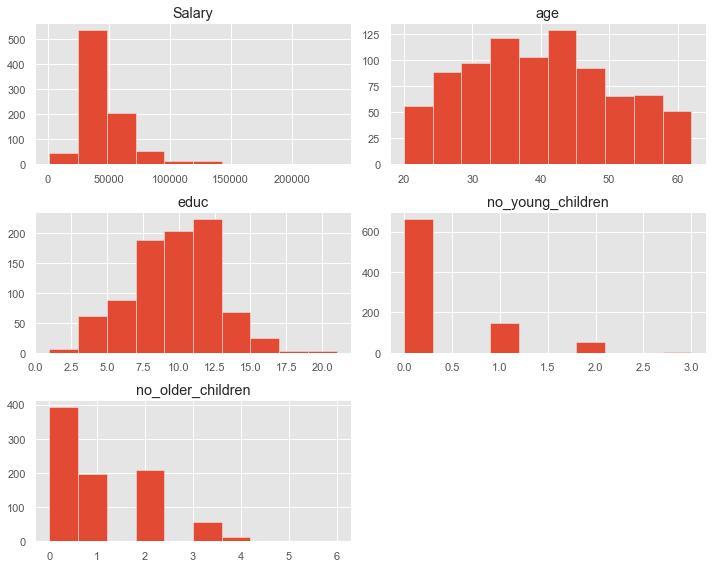

In [94]:
holiday[numcols].hist(figsize=(10,8))
plt.tight_layout()

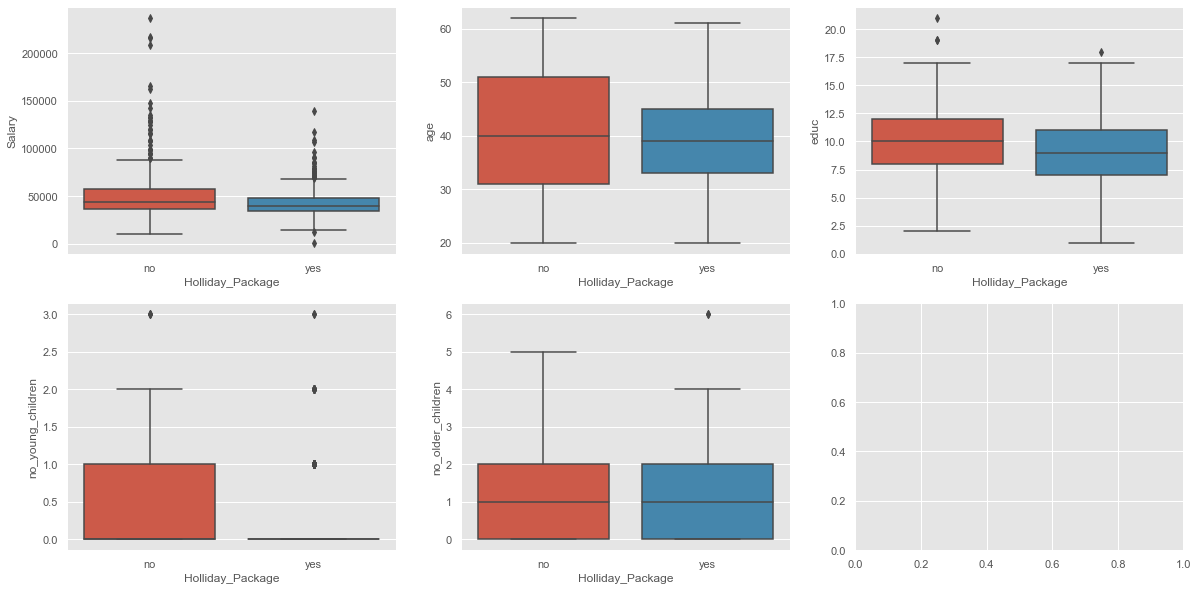

In [95]:
fig, axs = plt.subplots(2,3, figsize=(20,10))

axs = axs.ravel()

for i in range(len(numcols)):
    sns.boxplot(x='Holliday_Package',
                y=numcols[i],
                data=holiday,
                ax=axs[i])

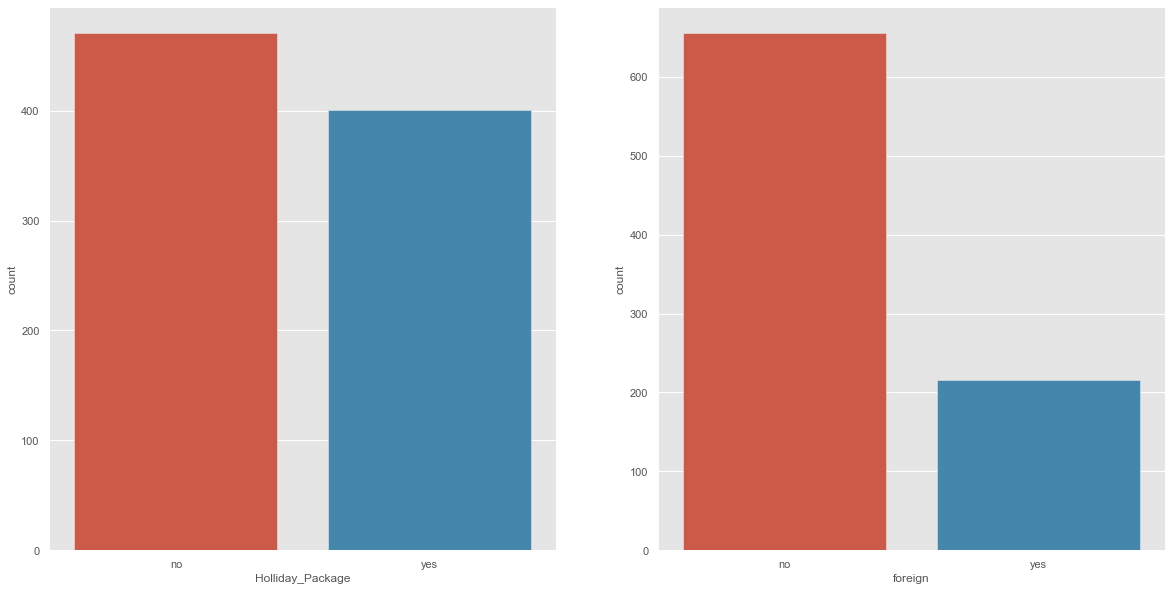

In [96]:
fig, axs = plt.subplots(1,2, figsize=(20,10))

axs = axs.ravel()

for i in range(len(catcols)):
    sns.countplot(x=catcols[i],
                data=holiday,
                ax=axs[i])

In [97]:
numcol2=['age','educ','no_young_children','no_older_children']

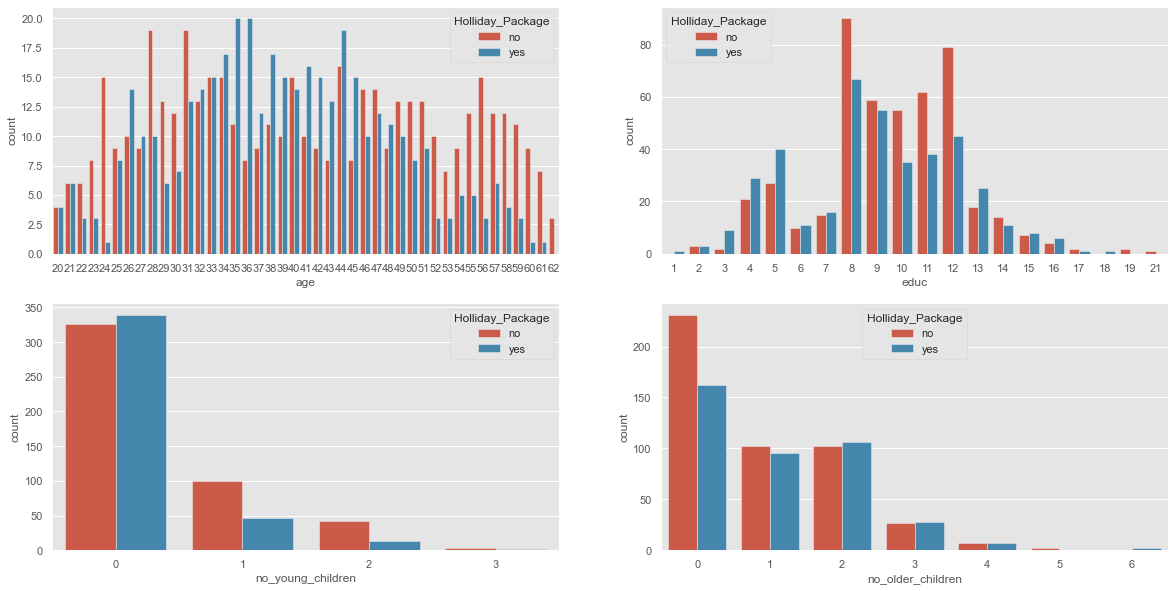

In [98]:
ig, axs = plt.subplots(2,2, figsize=(20,10))

axs = axs.ravel()

for i in range(len(numcol2)):
    sns.countplot(x=numcol2[i],
                data=holiday,
                ax=axs[i],hue='Holliday_Package')

In [99]:
# cross tabulation
tab1 = pd.crosstab(holiday['foreign'], 
                  holiday['Holliday_Package'])
tab1

Holliday_Package,no,yes
foreign,,
no,402,254
yes,69,147


In [100]:
# cross tabulation
tab = pd.crosstab(holiday['foreign'], 
                  holiday['Holliday_Package'],normalize='index').round(2)*100
tab

Holliday_Package,no,yes
foreign,,
no,61.0,39.0
yes,32.0,68.0


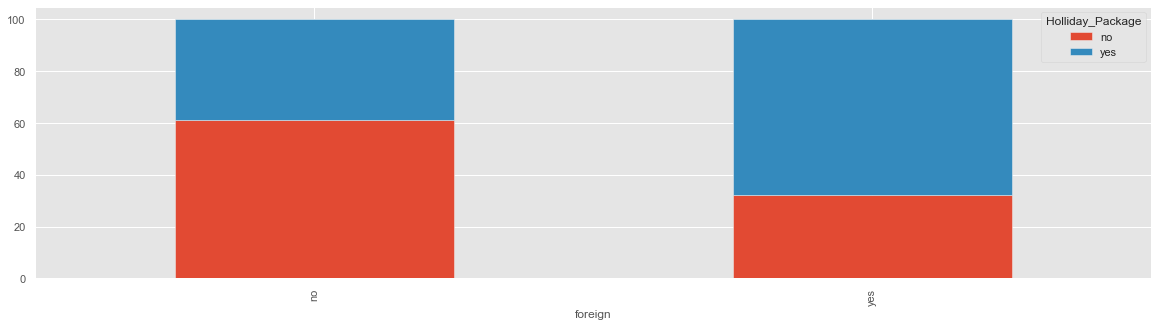

In [101]:
tab.plot(kind='bar',stacked=True);

In [102]:
holiday.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

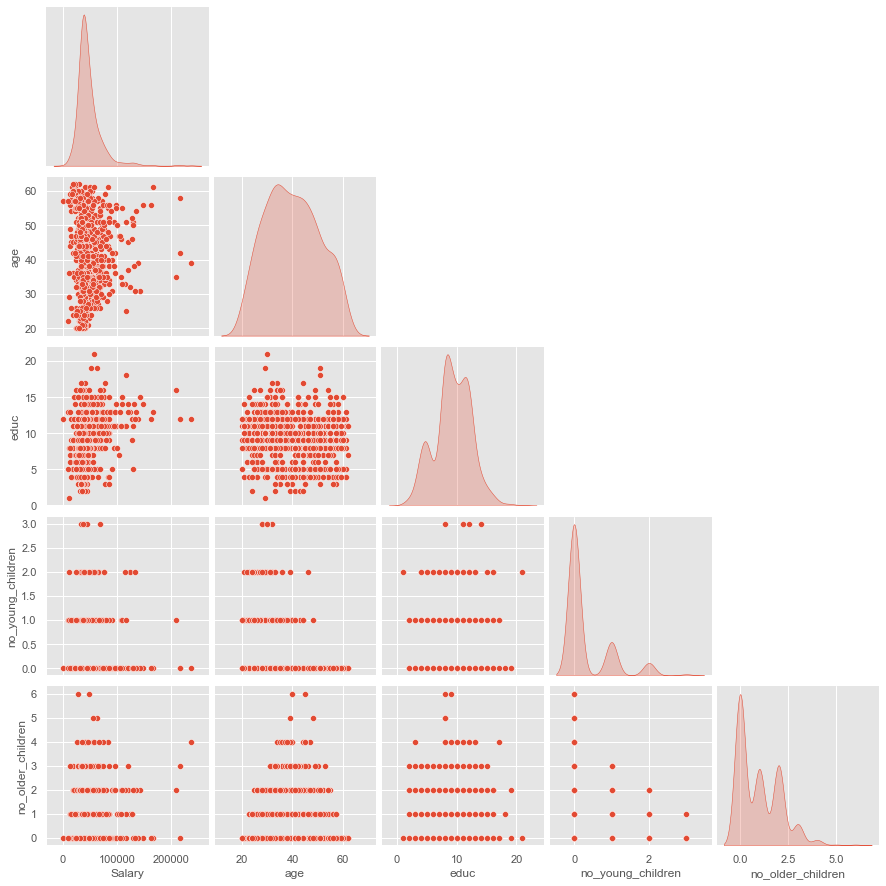

In [103]:
sns.pairplot(data=holiday[numcols],corner=True,diag_kind='kde');

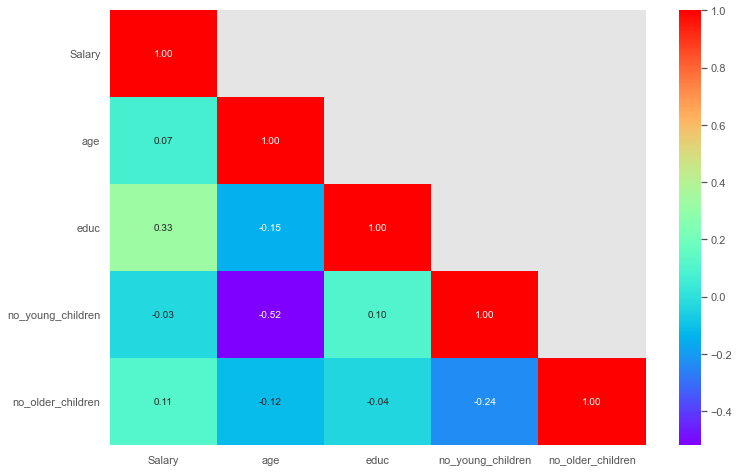

In [104]:
plt.figure(figsize=(12,8))
sns.heatmap(holiday.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(holiday.corr(),+1))
plt.show()

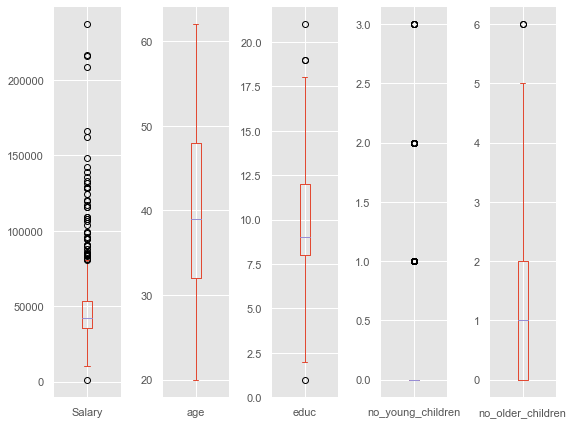

In [105]:
holiday[numcols].plot(kind = 'box',subplots=True, figsize = (8,6));
plt.tight_layout();

In [106]:
for column in holiday[numcols].columns:
    lr,ur=remove_outlier(holiday[column])
    holiday[column]=np.where(holiday[column]>ur,ur,holiday[column])
    holiday[column]=np.where(holiday[column]<lr,lr,holiday[column])

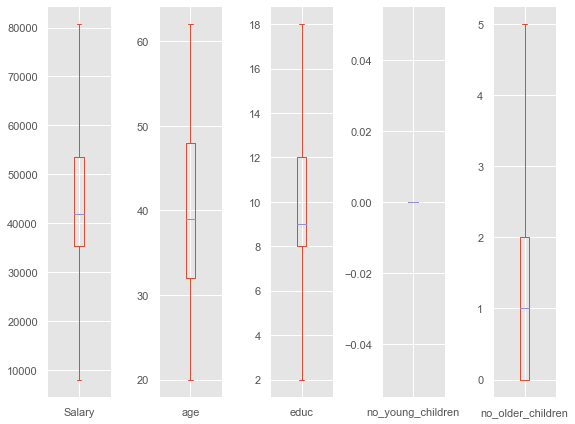

In [107]:
holiday[numcols].plot(kind = 'box',subplots=True, figsize = (8,6));
plt.tight_layout();

In [108]:
holiday=pd.get_dummies(holiday,columns=catcols,drop_first=True)

In [109]:
holiday.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [110]:
X=holiday.drop('Holliday_Package_yes',axis=1)
y=holiday[['Holliday_Package_yes']]

In [111]:
X.shape

(872, 6)

In [112]:
y.shape

(872, 1)

In [113]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30 , random_state=1234,stratify=y)

In [114]:
# target variable class proportions
y_train.value_counts(normalize=True)

Holliday_Package_yes
0                       0.539344
1                       0.460656
dtype: float64

In [115]:
y_test.value_counts(normalize=True)

Holliday_Package_yes
0                       0.541985
1                       0.458015
dtype: float64

### logistic regression

In [116]:
params={'penalty':['l1','l2','none'],
       'solver':['lbfgs','liblinear'],
       'tol':[0.0001,0.000001]}

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV

In [118]:
model=LogisticRegression(max_iter=100000,n_jobs=2)

In [119]:
grid_search=GridSearchCV(estimator=model,param_grid=params,cv=3,n_jobs=1,scoring='f1')

In [120]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [121]:
grid_search.best_params_

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-06}

In [122]:
best_grid=grid_search.best_estimator_

In [123]:
best_grid

LogisticRegression(max_iter=100000, n_jobs=2, solver='liblinear', tol=1e-06)

### Predicting on Training and Test dataset

In [124]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

### Getting the Predicted Classes and Probs

In [125]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.309147,0.690853
1,0.594757,0.405243
2,0.569197,0.430803
3,0.514572,0.485428
4,0.564352,0.435648


### Model Evaluation

### AUC and ROC for the training data

AUC: 0.636


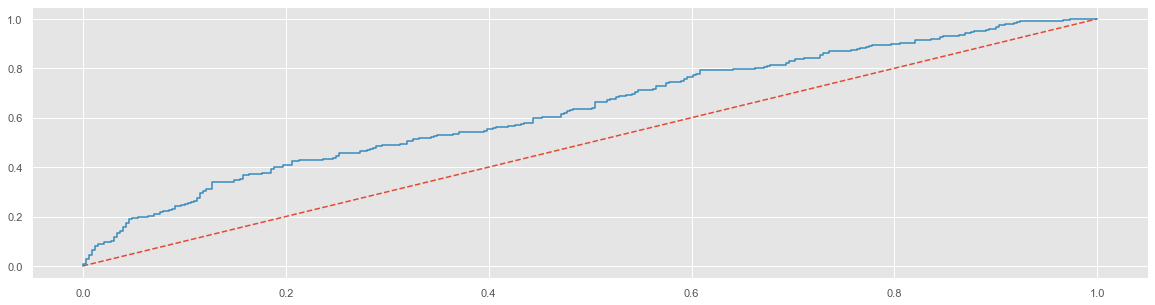

In [126]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logit_train_auc)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr);

### AUC and ROC for the test data

AUC: 0.714


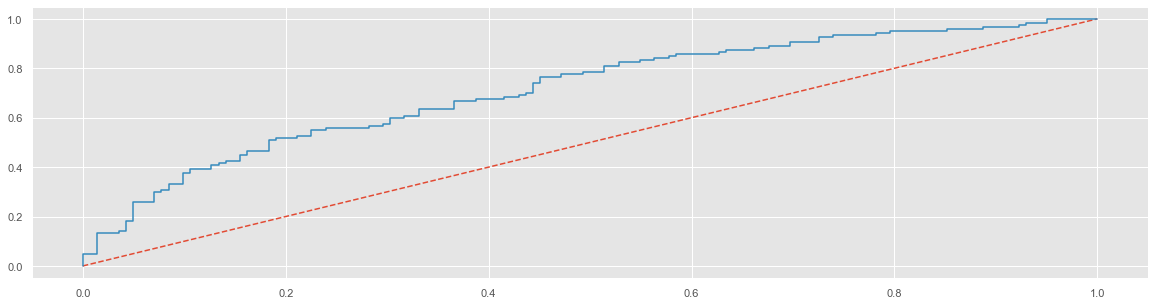

In [127]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logit_test_auc)
# calculate roc curve
logit_test_fpr, logit_test_tpr, logit_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_test_fpr, logit_test_tpr);

### Confusion Matrix for the training data

In [128]:
confusion_matrix(y_train, ytrain_predict)

array([[277,  52],
       [179, 102]], dtype=int64)

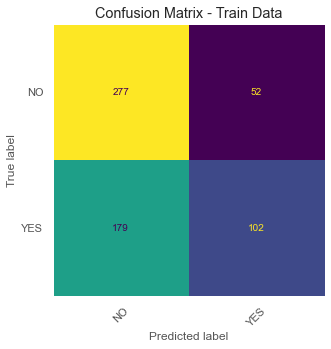

In [129]:
plot_confusion_matrix(best_grid,X_train,y_train,colorbar=False)
plt.grid(False)
classNames = ['NO', 'YES']
plt.title('Confusion Matrix - Train Data')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks,classNames);


In [130]:
#Train Data Accuracy
logit_train_acc=best_grid.score(X_train,y_train) 
logit_train_acc

0.6213114754098361

In [131]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.61      0.84      0.71       329
           1       0.66      0.36      0.47       281

    accuracy                           0.62       610
   macro avg       0.63      0.60      0.59       610
weighted avg       0.63      0.62      0.60       610



In [132]:
logit_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_train_precision=round(df.loc["1"][0],2)
logit_train_recall=round(df.loc["1"][1],2)
logit_train_f1=round(df.loc["1"][2],2)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print ('logit_train_f1 ',logit_train_f1)

logit_train_precision  0.66
logit_train_recall  0.36
logit_train_f1  0.47


### Confusion Matrix for test data

In [133]:
confusion_matrix(y_test,ytest_predict)

array([[122,  20],
       [ 70,  50]], dtype=int64)

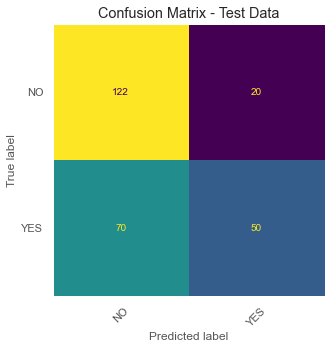

In [134]:
plot_confusion_matrix(best_grid,X_test,y_test,colorbar=False)
plt.grid(False)
classNames = ['NO', 'YES']
plt.title('Confusion Matrix - Test Data')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks,classNames);

In [135]:
#Test Data Accuracy
logit_test_acc=best_grid.score(X_test,y_test)
logit_test_acc

0.6564885496183206

In [136]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.86      0.73       142
           1       0.71      0.42      0.53       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.67      0.66      0.64       262



In [137]:
logit_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_test_precision=round(df.loc["1"][0],2)
logit_test_recall=round(df.loc["1"][1],2)
logit_test_f1=round(df.loc["1"][2],2)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_precision  0.71
logit_test_recall  0.42
logit_test_f1  0.53


### Linear Discriminant Analysis

In [138]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30 , random_state=1234,stratify=y)

In [139]:
#Build LDA Model & Train
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

### Predicting on Training and Test dataset

In [140]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [141]:
ytest_predict
ytest_predict_prob=model.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.295782,0.704218
1,0.597508,0.402492
2,0.575139,0.424861
3,0.520557,0.479443
4,0.570576,0.429424


### Model Evaluation

### AUC and ROC for the training data

AUC: 0.636


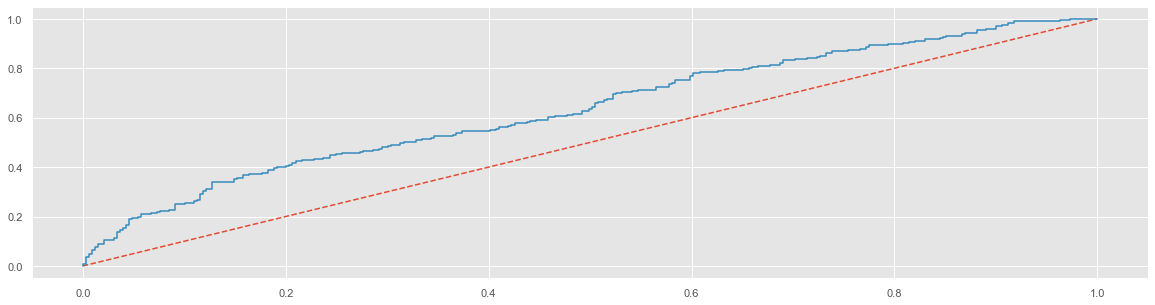

In [142]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr);

### AUC and ROC for the test data

AUC: 0.712


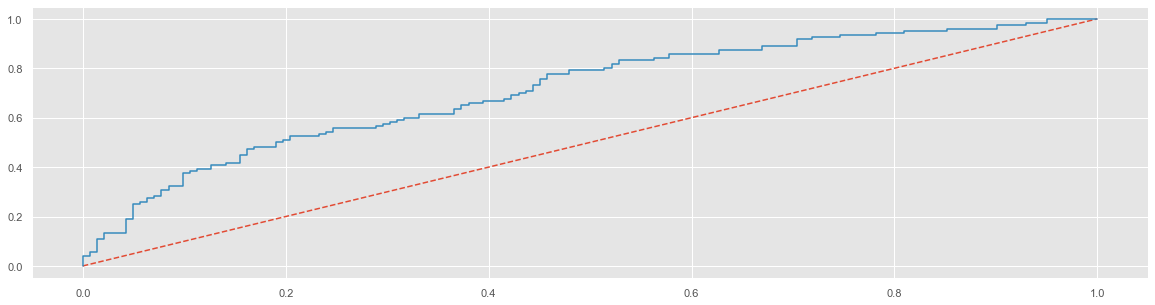

In [143]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr);

### Confusion Matrix for the training data

In [144]:
confusion_matrix(y_train, ytrain_predict)

array([[277,  52],
       [180, 101]], dtype=int64)

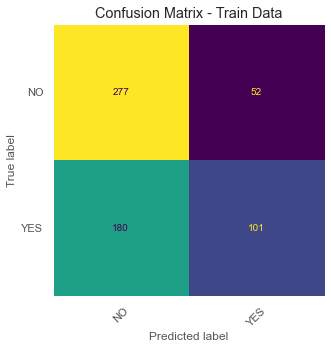

In [145]:
plot_confusion_matrix(model,X_train,y_train,colorbar=False)
plt.grid(False)
classNames = ['NO', 'YES']
plt.title('Confusion Matrix - Train Data')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks,classNames);

In [146]:
#Train Data Accuracy
lda_train_acc=model.score(X_train,y_train) 
lda_train_acc

0.6196721311475409

In [147]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.61      0.84      0.70       329
           1       0.66      0.36      0.47       281

    accuracy                           0.62       610
   macro avg       0.63      0.60      0.59       610
weighted avg       0.63      0.62      0.59       610



In [148]:
lda_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_precision=round(df.loc["1"][0],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_f1=round(df.loc["1"][2],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.66
lda_train_recall  0.36
lda_train_f1  0.47


### Confusion Matrix for test data

In [149]:
confusion_matrix(y_test, ytest_predict)

array([[122,  20],
       [ 71,  49]], dtype=int64)

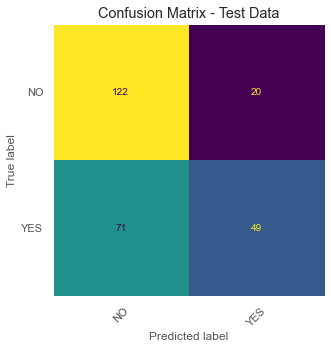

In [150]:
plot_confusion_matrix(model,X_test,y_test,colorbar=False)
plt.grid(False)
classNames = ['NO', 'YES']
plt.title('Confusion Matrix - Test Data')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks,classNames);

In [151]:
#Test Data Accuracy
lda_test_acc=model.score(X_test,y_test)
lda_test_acc

0.6526717557251909

In [152]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       142
           1       0.71      0.41      0.52       120

    accuracy                           0.65       262
   macro avg       0.67      0.63      0.62       262
weighted avg       0.67      0.65      0.63       262



In [153]:
lda_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
print ('lda_train_precision ',lda_test_precision)
print ('lda_train_recall ',lda_test_recall)
print ('lda_train_f1 ',lda_test_f1)

lda_train_precision  0.71
lda_train_recall  0.41
lda_train_f1  0.52


In [154]:
pred_train_prob = model.predict_proba(X_train)

In [155]:
# A function to evaluate accuracy,f1,recall for each threshold prob and return a data frame with all these metrics. It takes the train data probability predictions as input

def custom_threshold_metrics(pred_train_prob):
    thresh = [] # empty list to store threshold prob values
    acc = [] # empty list to store accuracy for various threshold values
    f1_scr = [] # empty list to store F1 score for various...
    rec = [] # empty list to store recall score for various...
    prec =[]

    for thresh_prob in np.arange(0.1,1,0.1):
        thresh.append(thresh_prob)
        custom_cutoff_pred=[]#defining an empty list to store category predictions
        
        #defining a loop for the length of the test data
        for i in range(0,len(y_train)):
            # checking the condition for our probability values to be greater 
            # than the custom cutoff/threshold probability value
            if pred_train_prob[:,1][i] > thresh_prob:
                a=1 # if predicted prob > threshold then predict category 1
            else:
                a=0 # else predict 0
            # add category predictions of train data for given threshold
            custom_cutoff_pred.append(a)
        acc.append(np.round(accuracy_score(y_train,custom_cutoff_pred),3))
        f1_scr.append(np.round(f1_score(y_train,custom_cutoff_pred),3))
        rec.append(np.round(recall_score(y_train,custom_cutoff_pred),3))
        prec.append(np.round(precision_score(y_train,custom_cutoff_pred),3))
        # add a line for precision if you want to.
    # put it all in a dataframe for easy comparison
    df_eval = pd.DataFrame({'threshold_prob':thresh,
                           'Acc':acc,
                           'f1':f1_scr,
                           'recall':rec,
                           'precision':prec})
    return df_eval


In [156]:
result_df=custom_threshold_metrics(pred_train_prob)
# type(result_df)

In [157]:
result_df.sort_values(by=['precision'], ascending=False)

,threshold_prob,Acc,f1,recall,precision
6,0.7,0.574,0.198,0.114,0.744
5,0.6,0.625,0.456,0.342,0.686
4,0.5,0.620,0.465,0.359,0.660
3,0.4,0.564,0.575,0.641,0.522
2,0.3,0.490,0.641,0.989,0.474
0,0.1,0.461,0.631,1.000,0.461
1,0.2,0.461,0.631,1.000,0.461
7,0.8,0.539,0.000,0.000,0.000
8,0.9,0.539,0.000,0.000,0.000


### Comparison of the performance metrics from the 2 models

In [158]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LOGIT Train':[logit_train_acc,logit_train_auc,logit_train_recall,logit_train_precision,logit_train_f1],
        'LOGIT Test':[logit_test_acc,logit_test_auc,logit_test_recall,logit_test_precision,logit_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)

,LOGIT Train,LOGIT Test,LDA Train,LDA Test
Accuracy,0.62,0.66,0.62,0.65
AUC,0.64,0.71,0.64,0.71
Recall,0.36,0.42,0.36,0.41
Precision,0.66,0.71,0.66,0.71
F1 Score,0.47,0.53,0.47,0.52


### ROC Curve for the 2 models on the Training data

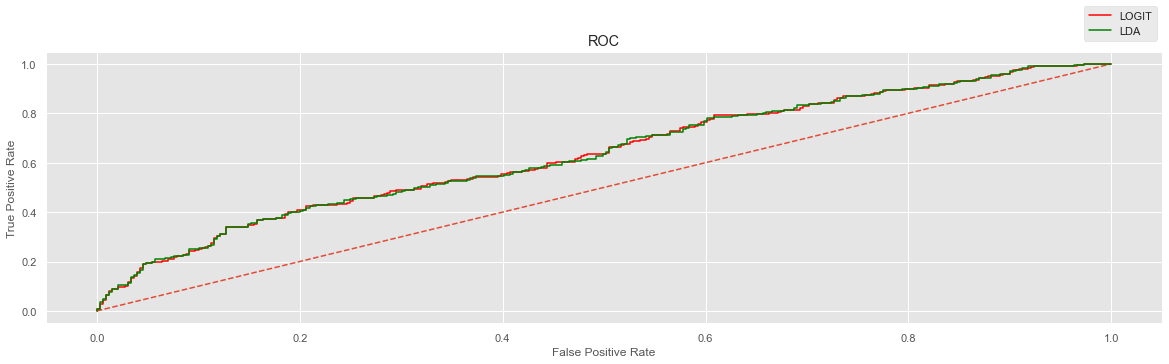

In [159]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_train_fpr, logit_train_tpr,color='red',label="LOGIT")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

### ROC Curve for the 2 models on the Test data

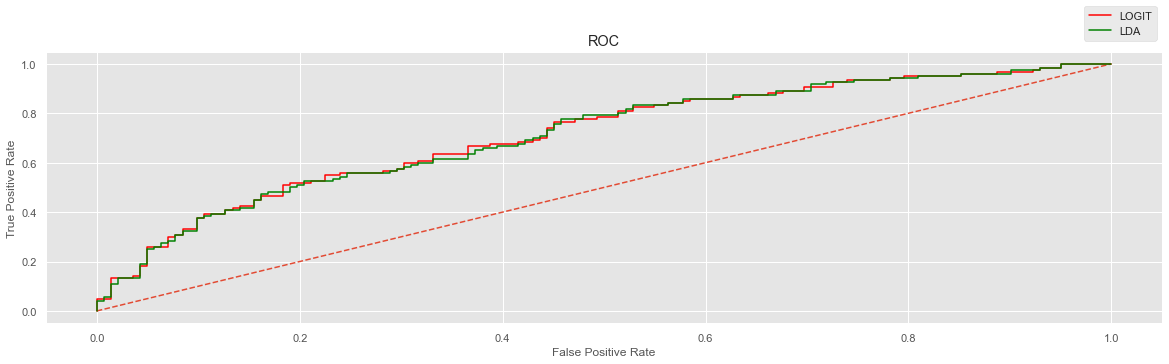

In [160]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_test_fpr, logit_test_tpr,color='red',label="LOGIT")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');